# ECE 143 Communication Towers Project
Christian Gunther
A11907943

This project deals with planning a communication network over a large rectangular region done by placing non-overlapping communication towers.

## Imports

In [1]:
from Tower import *
from TowerCoverage import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Question 1:
### Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?

The user must first input a desired number of communication towers. They must also input the desired width and height
of the overall coverage footprint. After this information is given, I can determine what the resulting coverage is.

Please enter the desired number of communication towers, a positive width, and a positive height:

In [2]:
n = 10
width = 20
height = 20
assert isinstance(n, int) and n > 0, "n must be a positive int"
assert isinstance(width, int) and width > 0, "n must be a positive int"
assert isinstance(height, int) and height > 0, "n must be a positive int"

My solution uses a Tower class that represents each communication tower. Each Tower stores its start position(the lower left hand corner of its coverage area), its width, and its height. The Towers can also determine whether their coverage area overlaps another Tower's coverage area.

To answer this question, I create Towers and add them to a list of Towers. While less than the desired number of towers n have been created and the entire area isn't covered, I keep creating new Towers and placing them in the area. Before the new Tower can be placed, though, it has to be checked against all previously placed Towers so that it doesn't overlap them. If it overlaps any Towers, it is trimmed down so that it has the maximum possible area, while not overlapping any other towers. If the new tower completely overlaps another tower, it is discarded. 

I used matplotlib to draw the grid and the towers' coverage areas.

<IPython.core.display.Javascript object>


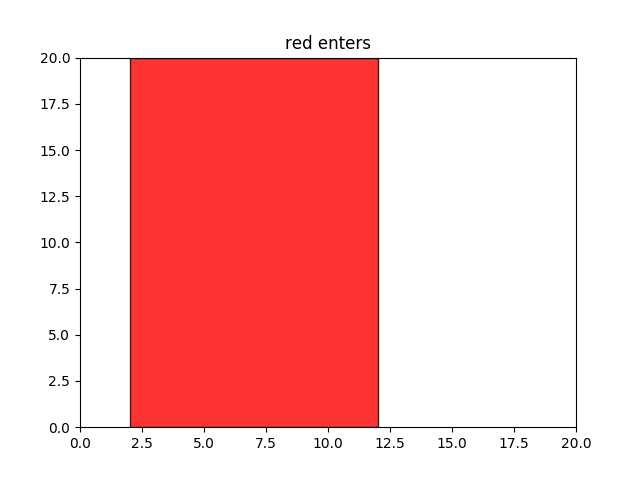

<IPython.core.display.Javascript object>


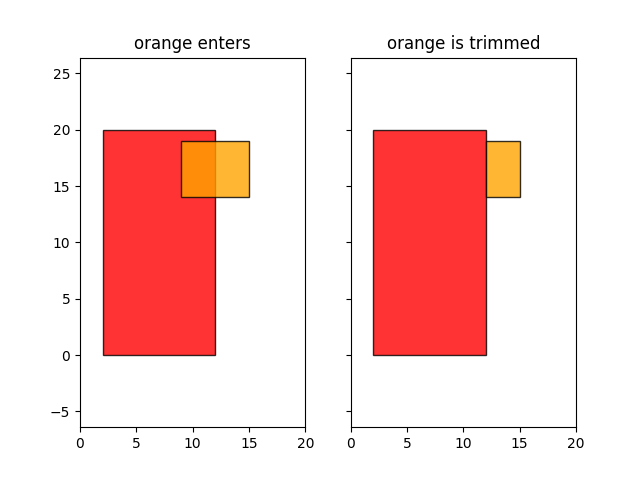

<IPython.core.display.Javascript object>


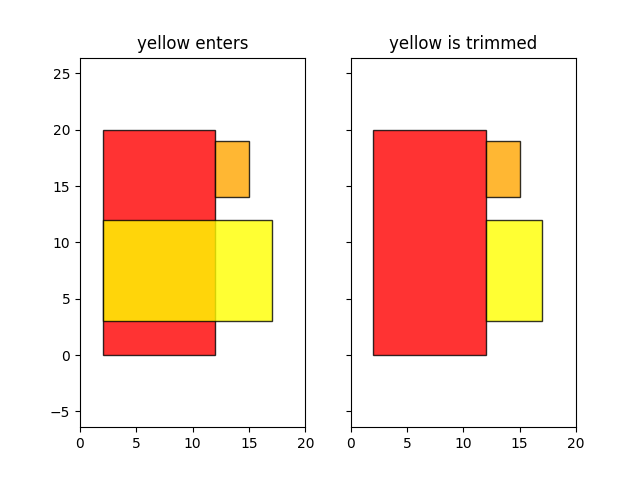

<IPython.core.display.Javascript object>


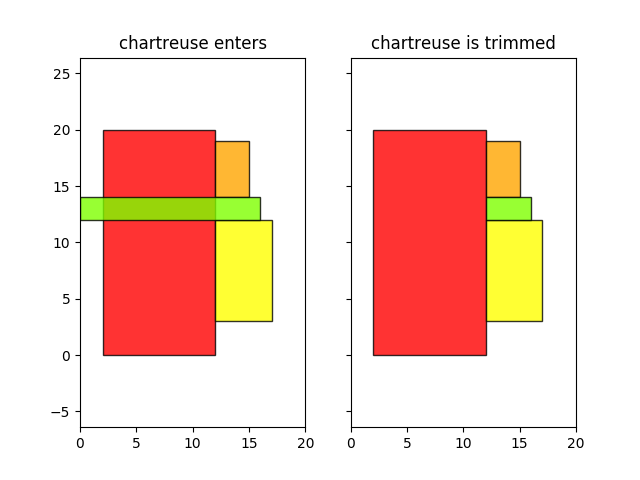

<IPython.core.display.Javascript object>


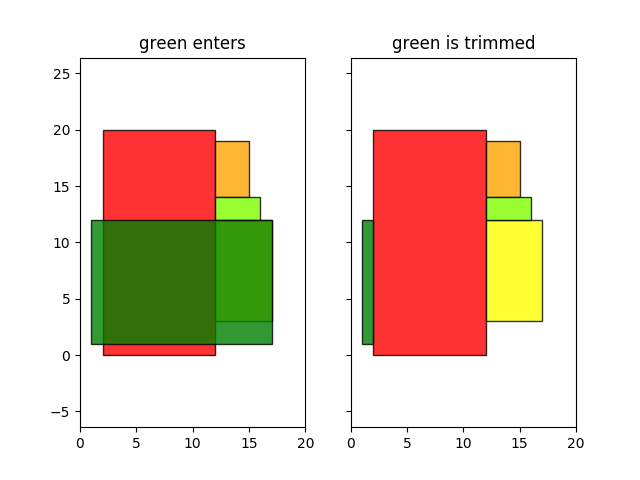

<IPython.core.display.Javascript object>


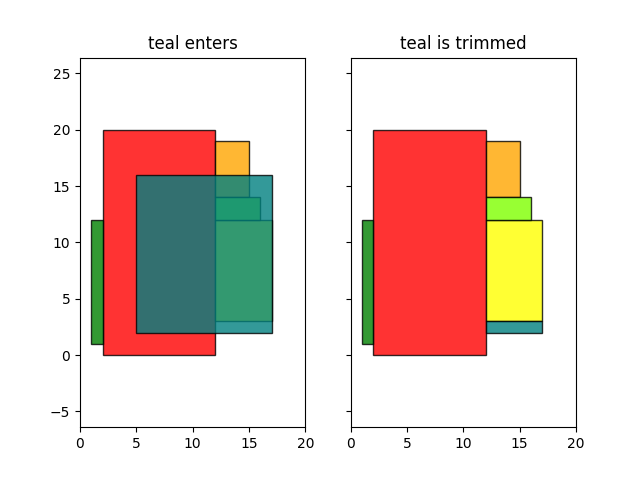

<IPython.core.display.Javascript object>


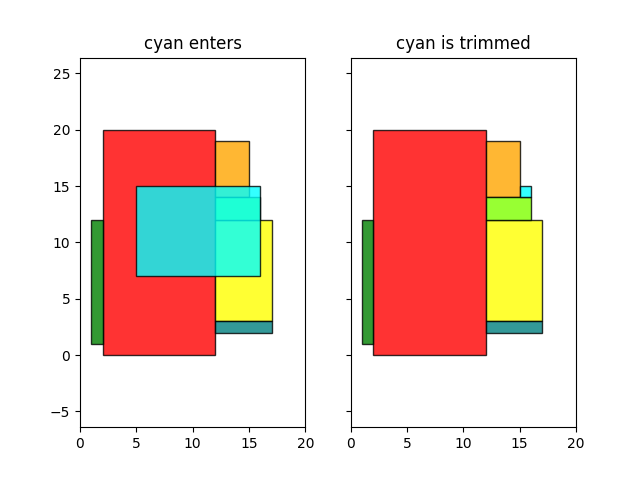

<IPython.core.display.Javascript object>


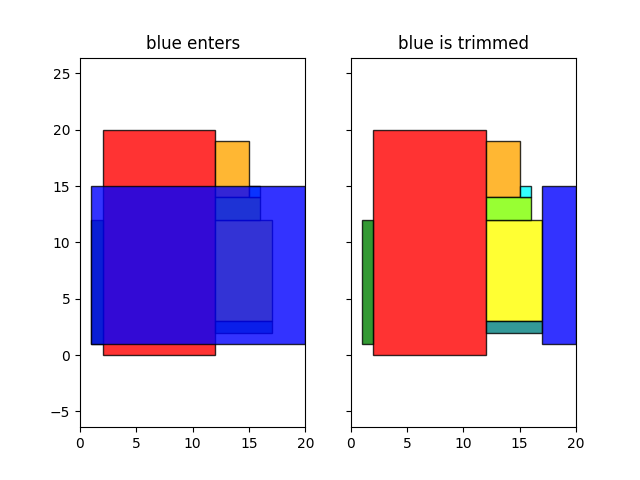

<IPython.core.display.Javascript object>


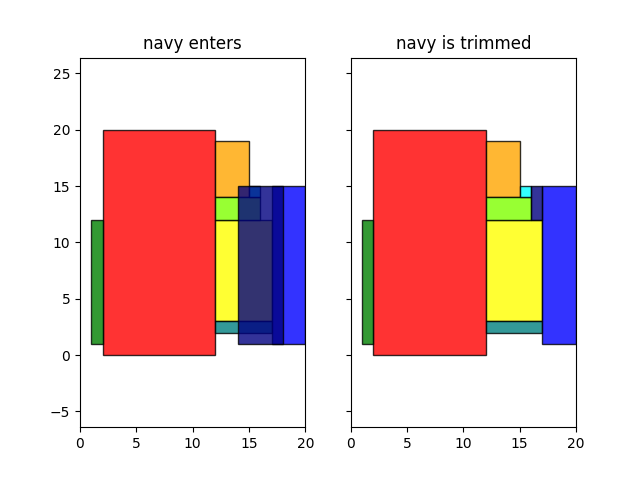

<IPython.core.display.Javascript object>


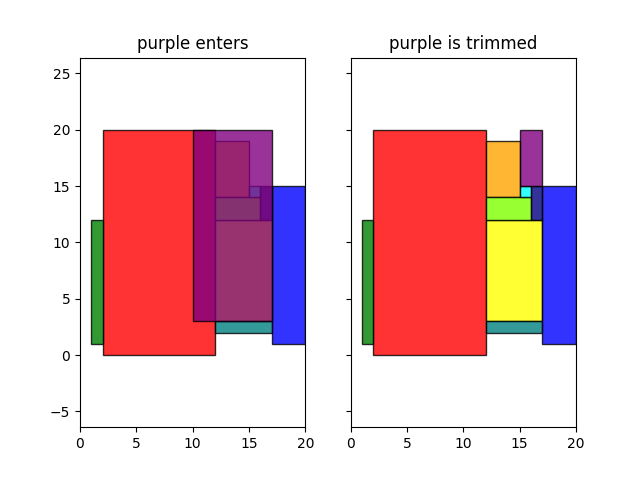

In [3]:
%matplotlib notebook

[towers, untrimmed, area] = coverageFromN(n, width, height)

untrimmed_rects = towersToRects(untrimmed)
trimmed_rects = towersToRects(towers)

#plot first rect, which doesn't need to be trimmed
cur_untrimmed = untrimmed_rects[0]
fig, ax1 = plt.subplots(1)
plt.axis([0, width, 0, height])
ax1.set_title('%s enters' % getColor(0))
ax1.add_patch(cur_untrimmed)

for i in range(1, len(trimmed_rects)):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex='all', sharey='all')
    ax1.set(aspect='equal')
    ax2.set(aspect='equal')
    plt.axis([0, width, 0, height])
    ax1.set_title('%s enters' % getColor(i))
    ax2.set_title('%s is trimmed' % getColor(i))
    
    untrimmed_rects = towersToRects(untrimmed)
    trimmed_rects = towersToRects(towers)
    
    #draw all past trimmed as well as next untrimmed
    cur_untrimmed = untrimmed_rects[i]
    for past in trimmed_rects[0:i]:
        ax1.add_patch(past)
    ax1.add_patch(cur_untrimmed)
    
    untrimmed_rects = towersToRects(untrimmed)
    trimmed_rects = towersToRects(towers)
    
    #draw all past trimmed as well as next trimmed
    cur_trimmed = trimmed_rects[i]
    for past in trimmed_rects[0:i]:
        ax2.add_patch(past)
    ax2.add_patch(cur_trimmed)

## Question 2:
### What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?

Using the grid and towers created from the previous function, I can calculate the total area the towers cover. This value is actually outputted by the getCoverageFromN function above as area, which is just the sum of the areas of each individual tower.

In [4]:
print("Total Area of Coverage: %d" % area)
desired_coverage = width*height
print("Desired Total Area of Coverage: %d" % desired_coverage)
percentage = 100*area/desired_coverage
print("%d%% of the Desired Area is covered." % percentage)
if(area < desired_coverage):
    print("There are gaps in coverage.")
else:
    print("There are no gaps in coverage.")

Total Area of Coverage: 340
Desired Total Area of Coverage: 400
85% of the Desired Area is covered.
There are gaps in coverage.


## Question 3:
### On average, how many communications towers are required before full coverage is obtained?

To solve this question, I used a similar function to my getCoverageFromN function. The only difference is that instead of stopping after n towers have been placed, I stop when the total area is covered.

Please enter the number of runs, a positive width, and a positive height:

In [5]:
runs = 200
width = 20
height = 20
assert isinstance(runs, int) and n > 0, "n must be a positive int"
assert isinstance(width, int) and width > 0, "n must be a positive int"
assert isinstance(height, int) and height > 0, "n must be a positive int"

In [6]:
sum = 0
for i in range(0,runs):
    [towers, untrimmed, count] = fullCoverage(width, height)
    sum += count
avg = sum/runs
print "Average Number of Runs Before Full Coverage: %d" % avg

Average Number of Runs Before Full Coverage: 24


## Analysis/Limitations


Designing a communication network has certain issues depending on the specifications of the network. In this case, the limitations of the network is that the position of the next tower that is added is random. This means that towers can easily overlap, instead of bringing towers on in a grid-like fashion so they each can cover a roughly equal area. Also, the size of the network coverage areas is uniformly distributed, so it is rarely a square, which is the most efficient coverage area. The first towers to come on cover large areas, while later towers usually cover smaller areas. This could place strain on those larger towers, as they could have to handle more traffic. It also makes handoffs between towers more frequent if someone is near a bunch of smaller towers.

Another limitation of this design is that once a tower is up, it cannot be replaced by a new tower. If a small tower is created in the middle of the grid, and another larger tower is placed over it, the larger tower is trimmed, instead of just removing the smaller tower.

Another limitation of this design is that given a large coverage area and large number of towers, this algorithm becomes a lot more computationally complex. This is because each new tower placed must be compared to every tower already placed, which increases the amount of comparisons exponentially as the number of towers grows.